# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

Loading the Dataset

In [ ]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/machine_learning_mit/week_4/project/ExtraaLearn.csv')
df.head()


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


Checking the info of the dataset

In [ ]:
# Let us see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

Observations:

There are 4612 observations and 15 columns in the dataset.
All the columns have 4612 non-null values, i.e., there are no missing values in the data and no need to handle any missing values.

Let's check the unique values in each column

In [ ]:
# Checking unique values in each column
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

Observations:

ID is an identifier which is unique for each lead and we can drop this column as it would not add any value to our analysis.
On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.
Let's drop the columns mentioned above and define lists for numerical and categorical columns to explore them separately.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

Checking the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
df.shape

(4612, 15)

There are 4612 rows and 15 columns for the data.
That is 4612 leads(paid+unpaid customers) and 14 features plus the 1 status.


Checking for duplicate values

In [ ]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

There are no duplicated rows. We don't need to drop any duplicated rows.


Check missing values

In [ ]:
round(df.isnull().sum() / df.isnull().count() * 100, 2)

ID                       0.0
age                      0.0
current_occupation       0.0
first_interaction        0.0
profile_completed        0.0
website_visits           0.0
time_spent_on_website    0.0
page_views_per_visit     0.0
last_activity            0.0
print_media_type1        0.0
print_media_type2        0.0
digital_media            0.0
educational_channels     0.0
referral                 0.0
status                   0.0
dtype: float64

No missing value is found

In [ ]:
# As mentioned before, ID is an identifier which is unique for each lead and we can drop this column as it would not add any value to our analysis.

# Dropping the columns
df=df.drop(['ID'],axis=1)
df.head()

#As mentioned before there are 4612 observations and 15 columns in the dataset.
#All the columns have 4612 non-null values, i.e., there are no missing values in the data and no need to handle any missing values.


,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


Univariate analysis of numerical columns

In [ ]:
# Checking summary statistics

num_cols=['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

cat_cols=['current_occupation', 'first_interaction', 'profile_completed',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral', 'status']

# Checking summary statistics
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


Observations:

The average age of leads is 46 years old. Minimum age is 18 years old and maximum age is 63 years old.


On average the number of website visits is 3.5 times, ranging from minimum value of zero time to maximum value of 30 times.

The average time spent on website is 724 seconds (12 mins). The minimum time spent is 0 seconds (no time was spent) and maximum time spent is 2537 seconds (42 mins).

The average number of page(s) visited is 3 pages. At minimum no page was visited and maximum of 18 pages were visited.



## EDA

- It is a good idea to explore the data once again after manipulating it.

Univariate analysis of numerical columns

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, title, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_box2.set_title(title)
    ax_box2.set_xlabel(title)
    ax_hist2.set_title(title)
    ax_hist2.set_xlabel(title)


In [ ]:
# Checking summary statistics

num_cols=['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
num_title=['Age', 'Website Visited', 'Time spent on website', 'Page views per visit']

cat_cols=['current_occupation', 'first_interaction', 'profile_completed',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral', 'status']

# Checking summary statistics
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


Observations:

The average age of leads is 46 years old. Minimum age is 18 years old and maximum age is 63 years old.

On average the number of website visits is 3.5 times, ranging from minimum value of zero time to maximum value of 30 times.

The average time spent on website is 724 seconds (12 mins). The minimum time spent is 0 seconds (no time was spent) and maximum time spent is 2537 seconds (42 mins).

The average number of page(s) visited is 3 pages. At minimum no page was visited and maximum of 18 pages were visited.

Let's explore these variables in some more depth by observing their distributions

0.000    181
2.168     14
2.154     13
2.200     12
2.170     11
        ... 
5.793      1
4.944      1
5.624      1
1.413      1
2.692      1
Name: page_views_per_visit, Length: 2414, dtype: int64

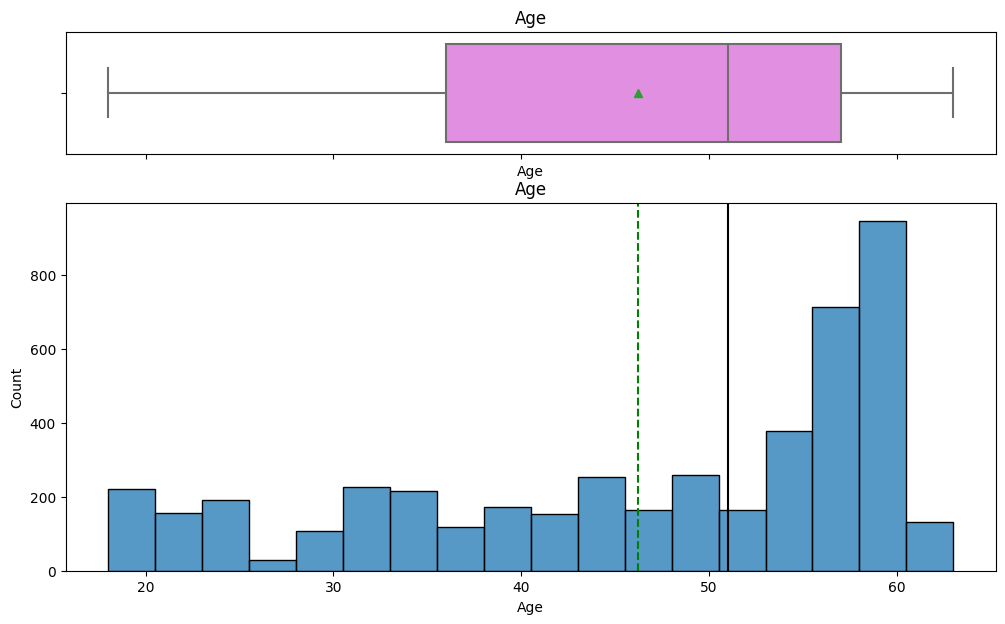

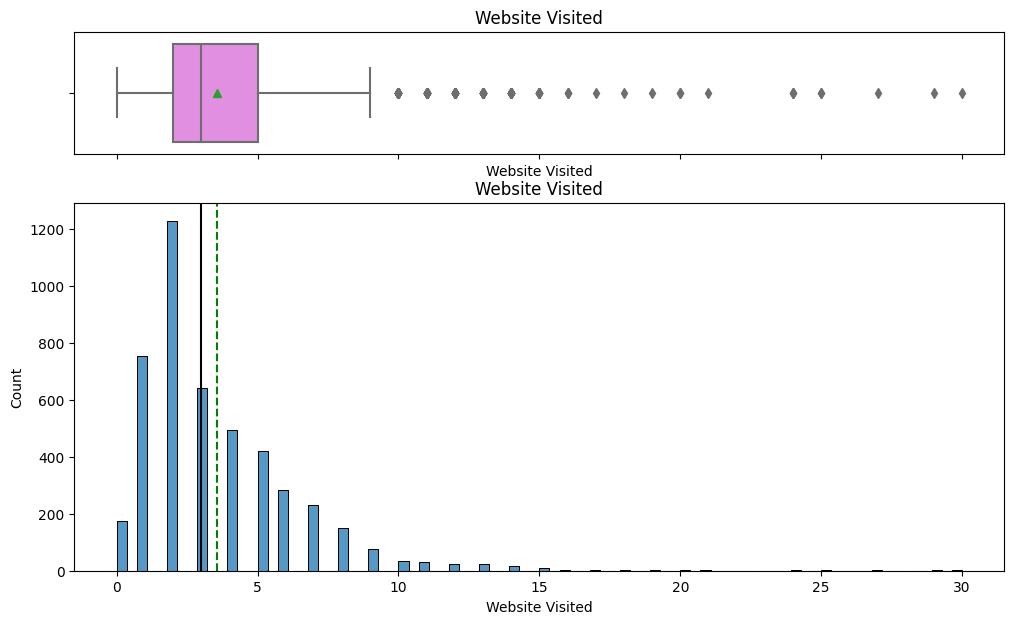

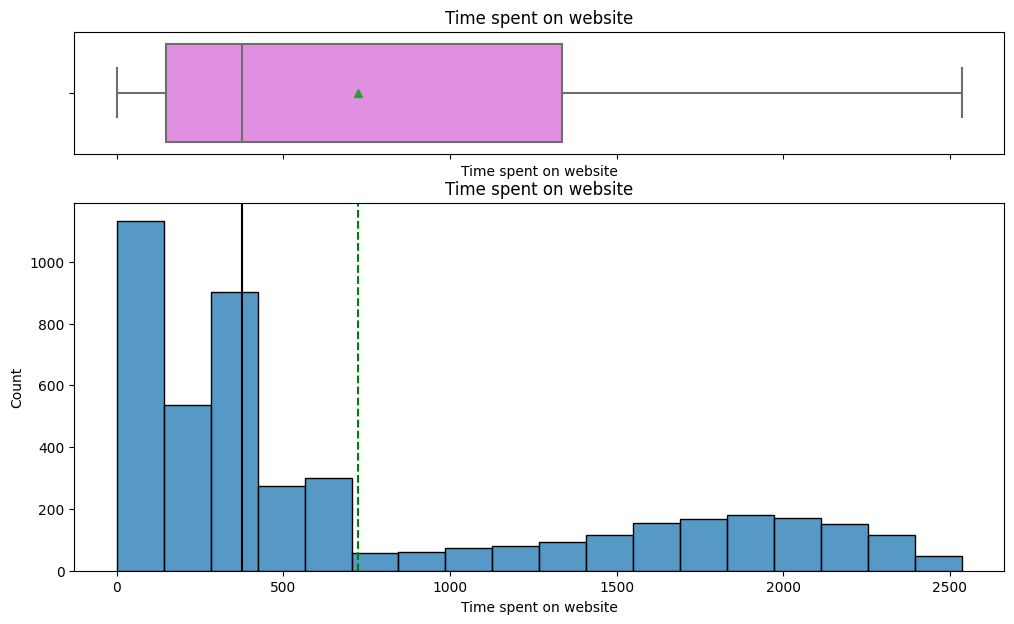

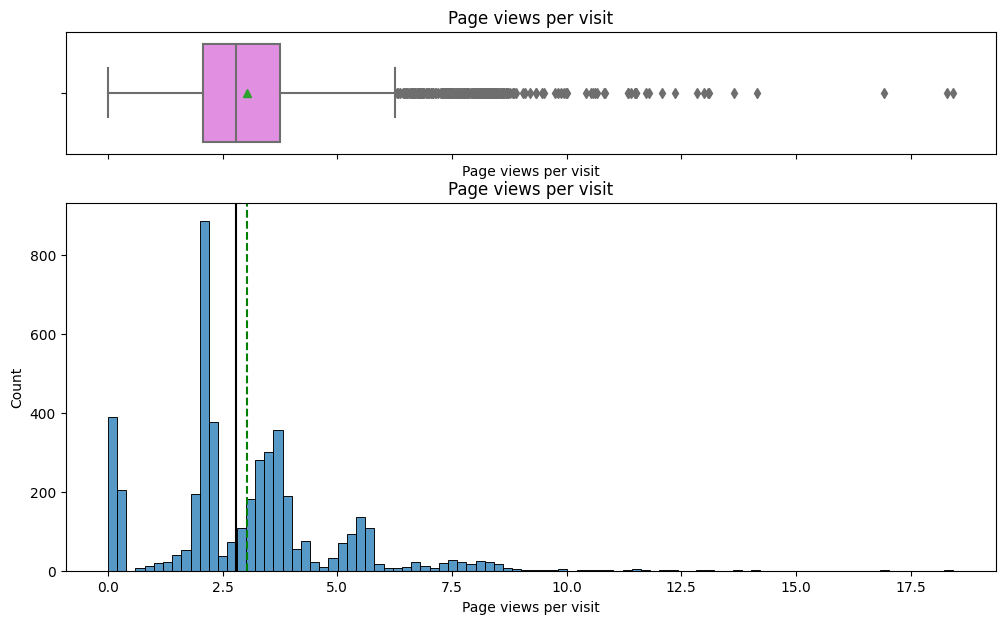

In [ ]:
# Creating histograms
#df[num_cols].hist(figsize=(14,14))
#plt.show()
j=0
for col in num_cols:
  histogram_boxplot(df,col,num_title[j])
  j=j+1

#df['age'].value_counts()
#df['website_visits'].value_counts()
#df['time_spent_on_website'].value_counts()
df['page_views_per_visit'].value_counts()





Observations:

The age is skewed to the left with peak at 57-58 years old.

The website visits is skewed to the right with peak at 2 times of website visits.

The time spent on website is skewed to right and has one largest peak at less than 250 seconds (less than 4 mins) and another smaller peak at range 1750 - 2000 seconds (from 29 - 33 mins)

The number of pages viewed per visit is skewed to right and has peak at 2 to 3 pages.




Univariate analysis for categorical variables


In [ ]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
****************************************
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
****************************************
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
****************************************
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
****************************************
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
****************************************
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
****************************************
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
****************************************
No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64
******

Observations:

More than half of the leads are professional which is 57 %.
About 31 % are unemployed and 12 % are students.

More than half (55 %) of the leads first interact with ExtraaLearn
through website whereas 45 % of them through mobile apps.

49 % of the leads completed the profile by high percent.
49 % of the leads completed the profile by medium percent.
2 % of the leads completed the profile by low percent.

49 % of last interaction between the lead and ExtraaLearn were through email.
27 % of last interaction between the lead and ExtraaLearn were through phone.
24 % of last interaction between the lead and ExtraaLearn were through website.


89 % of the leads had NOT seen the ad of ExtraaLearn in the Newspaper.
11 % of the leads had seen the ad of ExtraaLearn in the Newspaper.

95 % of the leads had NOT seen the ad of ExtraaLearn in the Magazine.
5 % of the leads had seen the ad of ExtraaLearn in the Magazine.


89 % of the leads had NOT seen the ad of ExtraaLearn in the digital platforms.
11 % of the leads had seen the ad of ExtraaLearn in the digital platforms.


85 % the lead had NOT heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
15 % the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.

98 % of the lead had NOT heard about ExtraaLearn through reference.
2 % of the lead had heard about ExtraaLearn through reference.

30 % of the lead was converted to a paid customer. The rest of 70 %
was NOT.





Bivariate and Multivariate analysis

We have analyzed different categorical and numerical variables. Let's now check how does conversion rate is related with other categorical variables.



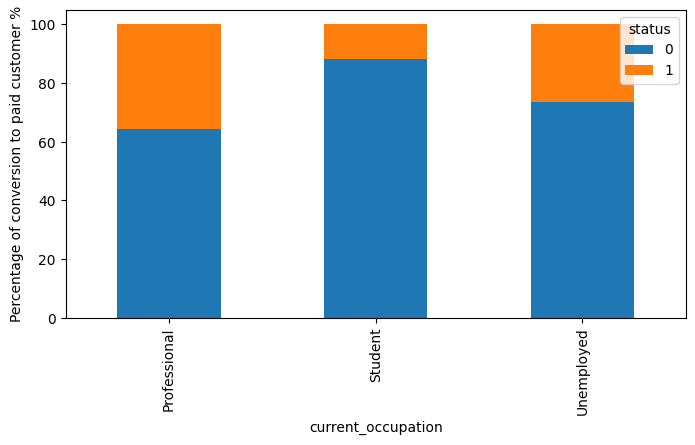

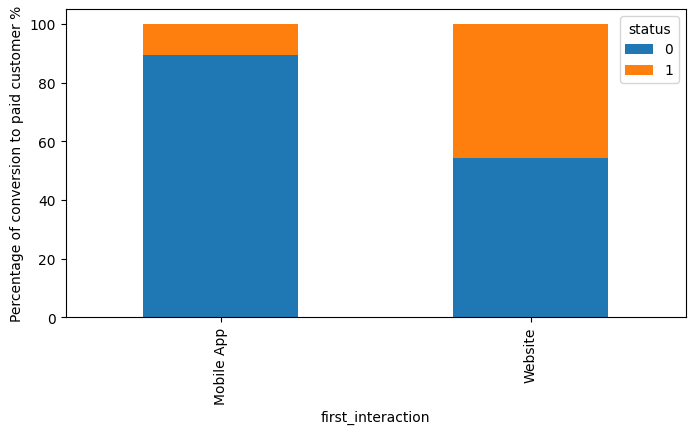

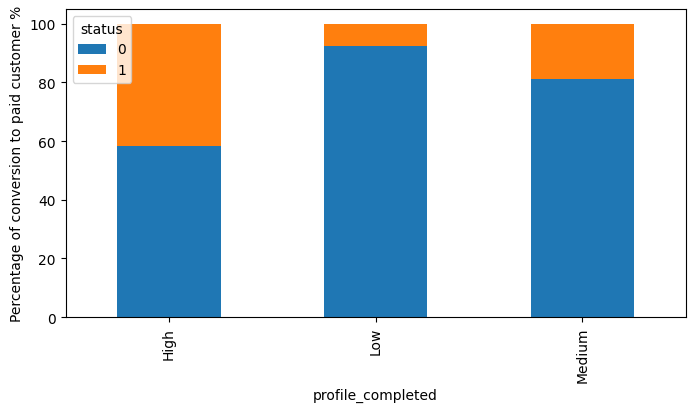

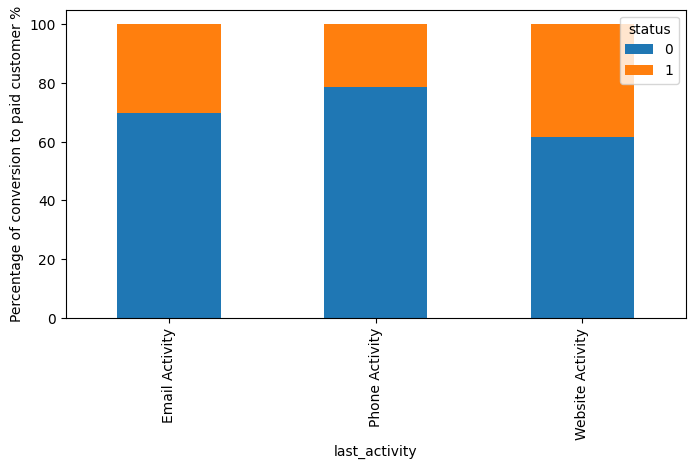

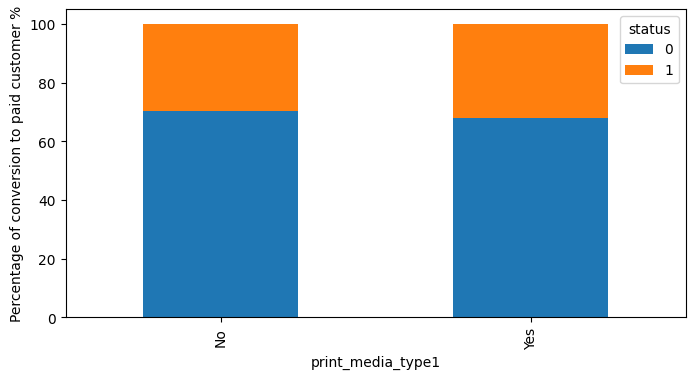

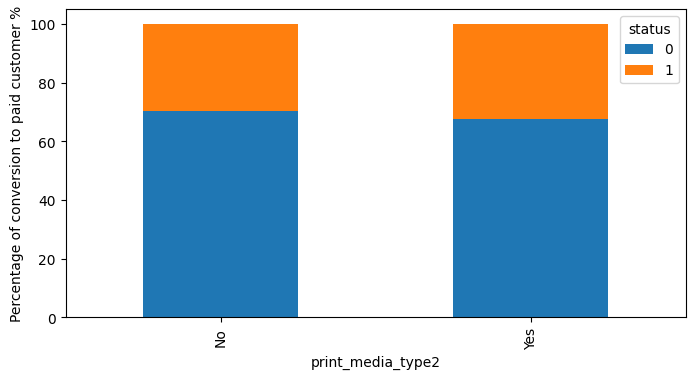

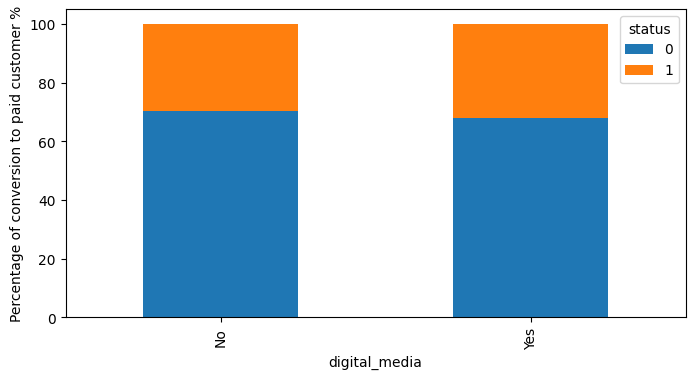

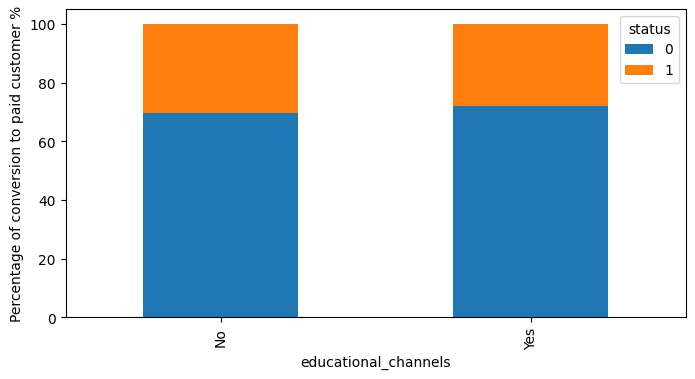

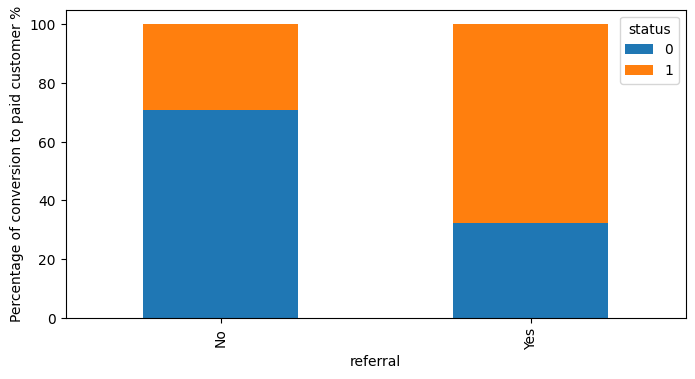

In [ ]:
for i in cat_cols:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage of conversion to paid customer %')

Observations:

Professional has highest conversion rate,
unemployed the second whereas the student
has lowest conversion rate.
This is because professional has highest desire and needs
to upgrade their skills at work in order to remain competitive
in their job market. This group of people is also the richest
group of people and more likely and able to pay for the course.

Unemployed people also need to upgrade their skills in order
to increase of chance of getting their new job.

The courses are job related and student is less likely to be interested
in the courses and this group of people has to pay full attention to their
study and less urgent to look for the online courses which are mostly
job related. Besides, this group of people has no income and they are least able
to pay for the course.

First interaction through website has higher conversion rate(to paid customers)
than through mobile apps. There are two possible reasons:
1) Playing with website through computer enjoys larger screen
and better GUI experience comparing with mobile apps which is smaller screen.

2) Playing with website through computer at home or office is totally different
environment comparing with playing with mobile apps on the street or public location
such as restaurant. People are more likely to make any important decision
in a formal or relaxed environment such as home or office rather than on the
street where they may feel rush or insecure according to some psychological studies.


People who completed high percentage of the profile tends to pay eventually
whereas people who completed low percentage of the profile are least likely
to pay eventually. This is because completing high percentage of profile means
than they are very interested in the course and they really trust the platform.

People who is not interested in the course tends to fill in least amount of information
in the profile.


Last activity in website has highest percentage of conversion to paid customers.
Email the second whereas the phone is lowest.


The lead who had seen the ad of ExtraaLearn in the newspaper has a slightly
higher chance of converting to paid customer.

The lead who had seen the ad of ExtraaLearn in the magazine has a slightly
higher chance of converting to paid customer.

The lead who had seen the ad of ExtraaLearn in the digital platforms has a slightly
higher chance of converting to paid customer.

The lead who had NOT heard about ExtraaLearn in the education channels
has a slightly higher chance of converting to paid customer.

The lead who had heard about ExtraaLearn through reference
has a much higher chance of converting to paid customer.




Let's check the relationship between conversion rate and Numerical variables


In [ ]:
# Mean of numerical variables grouped by attrition
df.groupby(['status'])[num_cols].mean()


,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


Observations:

The average age of people who decided to pay is 3 more years older than
the people who decided not to pay.

It seems the websites visited for people who decided to pay and people
who decided not to pay are almost the same. So it seems that this factor does not affect the result.

The time spent on the website for those people who decided to pay is much
longer than the people who decided not to pay because people staying on the
website for longer time are more interested in the courses and more likely
to pay.

The number of page(s) view per visit are similar for people who pay or not pay
for the courses.






Let's check the relationship between different numerical variables

<Axes: >

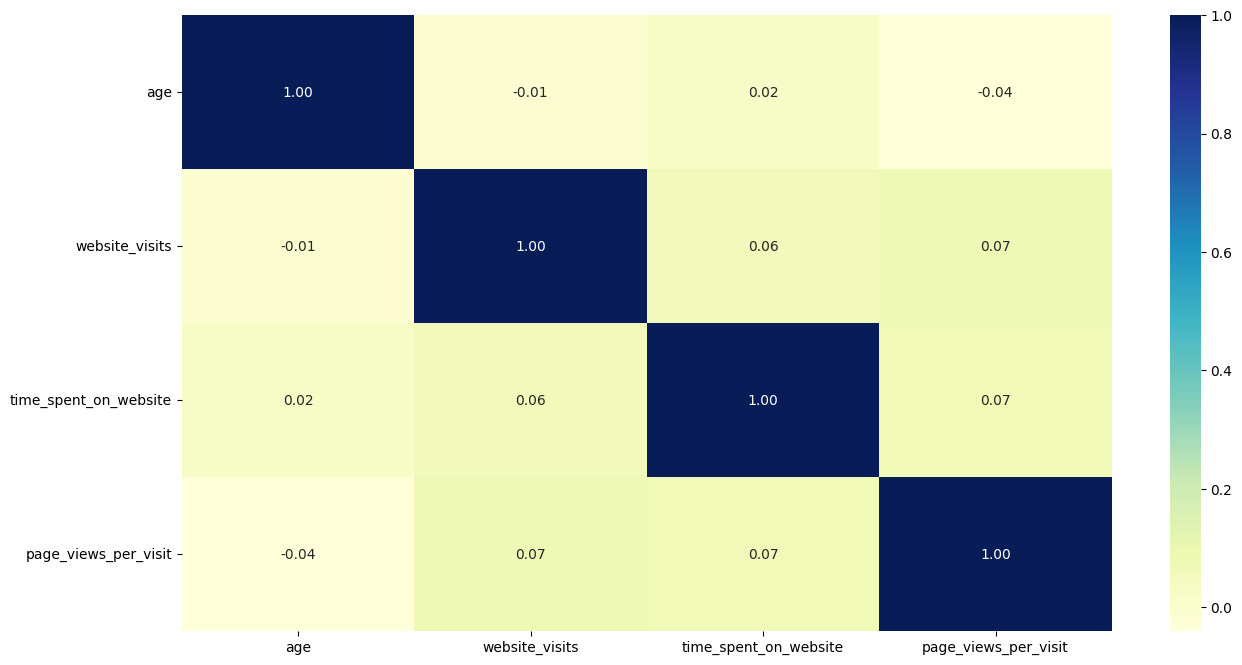

In [ ]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')



Observations:

Slight positive correlation between the number of times a lead has visited the website and total time (seconds) spent on the website.

Slight positive correlation between the number of times a lead has visited the website and average number of pages on the website viewed during the visits.

This is obvious because more number of times to visit website means more time
is spent on the website. And  more number of times to visit website means
the leader is interested in the related topics and so he or she
would click more number of pages in the website.

Slight negative correlation between the age and the average number of pages on the website viewed during the visits.
Slight negative correlation between the age and the number of times a lead has visited the website.

This is because younger people are more energetic and they tends to read and learn and digest more quickly and so they click more pages more frequently and
visit the webpages more number of times.










Creating dummy variables for categorical Variables


In [ ]:
#cat_cols=['current_occupation', 'first_interaction', 'profile_completed',
#       'last_activity', 'print_media_type1', 'print_media_type2',
#       'digital_media', 'educational_channels', 'referral', 'status']

# Creating list of dummy columns
#to_get_dummies_for=['current_occupation', 'first_interaction', 'profile_completed',
#       'last_activity', 'print_media_type1', 'print_media_type2',
#       'digital_media', 'educational_channels', 'referral']

#df = pd.read_csv('/content/drive/MyDrive/machine_learning_mit/week_4/project/ExtraaLearn.csv')
#df=df.drop(['ID'],axis=1)



dict_print_media_type1 = {'Yes': 1, 'No':0}
dict_print_media_type2 = {'Yes': 1, 'No':0}
dict_digital_media = {'Yes': 1, 'No':0}
dict_educational_channels = {'Yes': 1, 'No':0}
dict_referral = {'Yes': 1, 'No':0}

df['print_media_type1'] = df.print_media_type1.map(dict_print_media_type1)
df['print_media_type2'] = df.print_media_type2.map(dict_print_media_type2)
df['digital_media'] = df.digital_media.map(dict_digital_media)
df['educational_channels'] = df.educational_channels.map(dict_educational_channels)
df['referral'] = df.referral.map(dict_referral)


to_get_dummies_for=['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']

# Creating dummy variables
#df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)
df = pd.get_dummies(data = df)
df.to_csv('/content/drive/MyDrive/machine_learning_mit/week_4/project/ExtraaLearn2.csv')

#df = pd.get_dummies(data = df, columns = to_get_dummies_for)

# Mapping overtime and attrition
#dict_OverTime = {'Yes': 1, 'No':0}
#dict_attrition = {'Yes': 1, 'No': 0}

#print_media_type1	print_media_type2	digital_media	educational_channels	referral


#df.tail(10).T
#df.columns




Separating the independent variables (X) and the dependent variable (Y)


In [ ]:
# Separating target variable and other variables
Y= df.status
X= df.drop(columns = ['status'])
X.head()


,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,profile_completed_High,profile_completed_Low,profile_completed_Medium,last_activity_Email Activity,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.861,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1
1,56,2,83,0.320,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
2,52,3,330,0.074,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
3,53,4,464,2.057,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1
4,23,4,600,16.914,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0


Splitting the data into 70% train and 30% test set

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the stratified sampling technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.



In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)


Scaling the data
The independent variables in this dataset have different scales. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is Feature Scaling, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

Tree based models such as Decision Trees and Random Forest does not require feature scaling to be performed as they are not sensitive to the variance in the data.

We will scale the data for Logistic Regression and SVM. We will use the Standard Scaler method, which centers and scales the dataset using the Z-Score. It standardizes features by subtracting the mean and scaling it to have unit variance. The standard score of sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples (zero) and s is the standard deviation of the training samples.


In [ ]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)



Model evaluation criterion
The model can make two types of wrong predictions:

Predicting an lead will pay when the lead doesn't pay actually.
Predicting an lead will not pay when the lead actually pay
Which case is more important?

Predicting that the lead will not pay but the lead pay actually, i.e., losing out on a potential customer. This would be considered a major miss for any potential customer predictor and hence the more important case of wrong predictions.
How to reduce this loss i.e the need to reduce False Negatives?

ExtraaLearn would want the Recall to be maximized, the greater the Recall, the higher the chances of minimizing false negatives and maximizing profit. Hence, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives (i.e. Class 1) very well, so that the company can provide incentives to control the conversion rate especially, for potential customer. This would help in optimizing the overall  cost towards attracting the potential customers to pay finally.

Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.


In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['unpaid customer', 'paid customer'], yticklabels=['unpaid customer', 'paid customer'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

In [ ]:
#Let us investigate the percentage of datas belonging to class 0 (unpaid) and class 1(paid) respectively.

print(Y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())


0    3235
1    1377
Name: status, dtype: int64
0    2264
1     964
Name: status, dtype: int64
0    971
1    413
Name: status, dtype: int64


Observations:

Results show that majority class is class 0(unpaid customer)
which contributes about 70 % of all the datas.
In other words, most of the people decided not to pay
and less than half (30 percent) of all the leads decided to pay finally.


Decision Tree
We will build our model using the DecisionTreeClassifier function.
If the frequency of class 0 is 70% and the frequency of class 1 is 30%, then class 0 will become the dominant class and the decision tree will become biased toward the dominant class.
class_weight is a hyperparameter for the decision tree classifier, and in this case, we can pass a dictionary {0:0.70, 1:0.30} to the model to specify the weight of each class and the decision tree will give more weightage to class 0.


In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = 'balanced', random_state = 1)


In [ ]:
# Fitting decision tree model
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

Let's check the model performance of decision tree


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



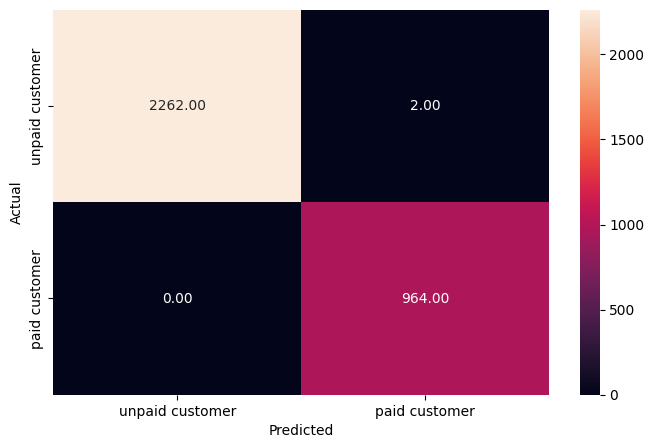

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train_scaled)

metrics_score(y_train, y_train_pred_dt)

Observation:

The Decision tree is giving a 100% score for almost all metrics on the training dataset. Only 2 cases of false negative were detected. There is no false positive detected.


              precision    recall  f1-score   support

           0       0.85      0.87      0.86       971
           1       0.67      0.64      0.65       413

    accuracy                           0.80      1384
   macro avg       0.76      0.75      0.76      1384
weighted avg       0.80      0.80      0.80      1384



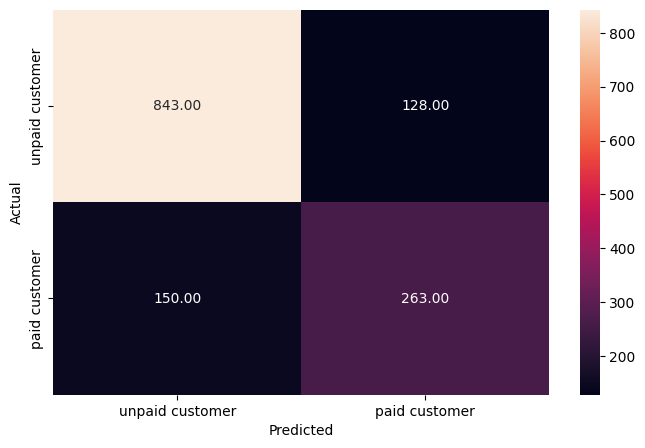

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test_scaled)

metrics_score(y_test, y_test_pred_dt)

Observations:

The Decision Tree works well on the training data but not so well on the test data as the recall is 0.64 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.
The precision on the test data is 67 % which suggests that there's a 33% (1 - 0.67) chance that the model will predict that a person is going to pay even though he/she would not, and the company may waste their time and energy on these people who are not going to pay actually.
The recall on the test data also suggests that there's a 36% (1 - 0.64) chance that the model will predict that a person is NOT going to pay even though he/she would pay actually, and the company may lose 36 % of potential customers finally.






Let's plot the feature importance and check the most important features.


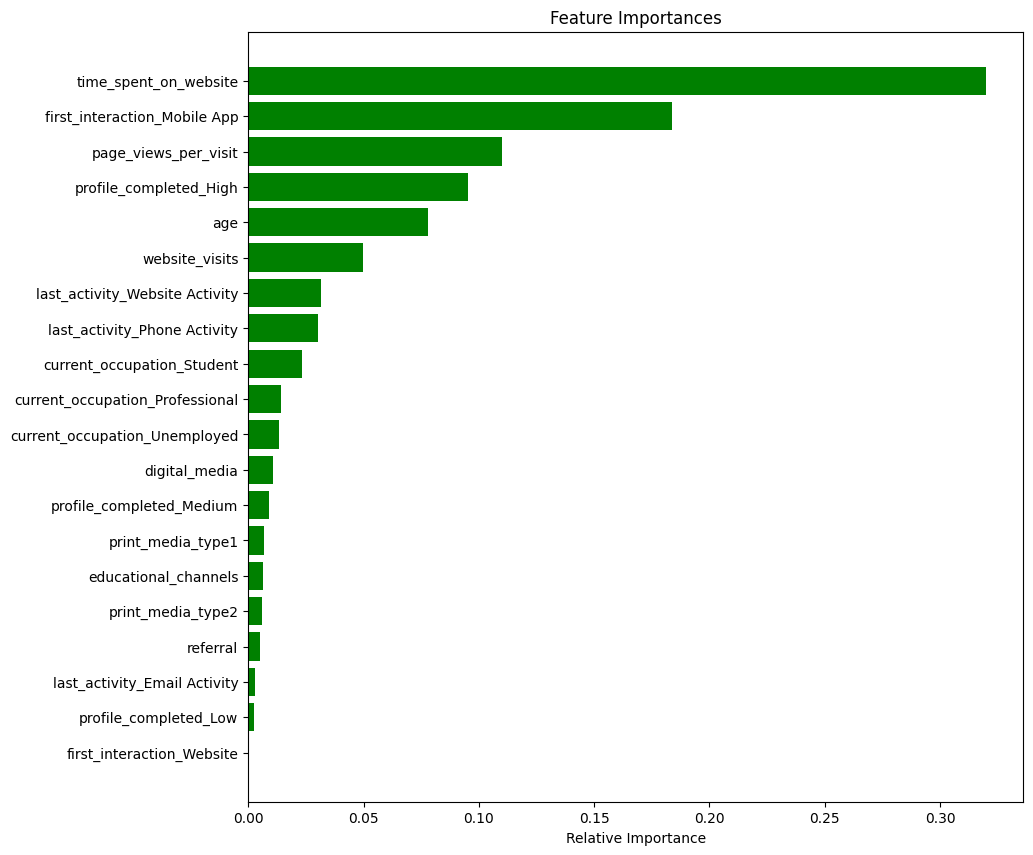

In [ ]:
#Plotting the feature importance
importances = dt.feature_importances_
#features = list(X.columns)
features = dt.feature_names_in_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.barh(range(len(indices)), importances[indices], color = 'green', align = 'center')


plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.show()

#importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

#print(importance_df)

Observations:

According to the decision Tree, the top most important factors are as below:

1) Time spent on website.

2) Whether first interaction is mobile app.

3) Page views per visit.

4) Whether profile completion is high.

5) Age.



Let's plot the tree and check:

As we know the decision tree keeps growing until the nodes are homogeneous, i.e., it has only one class, and the dataset here has a lot of features, it would be hard to visualize the whole tree with so many features. Therefore, we are only visualizing the tree up to max_depth = 4.


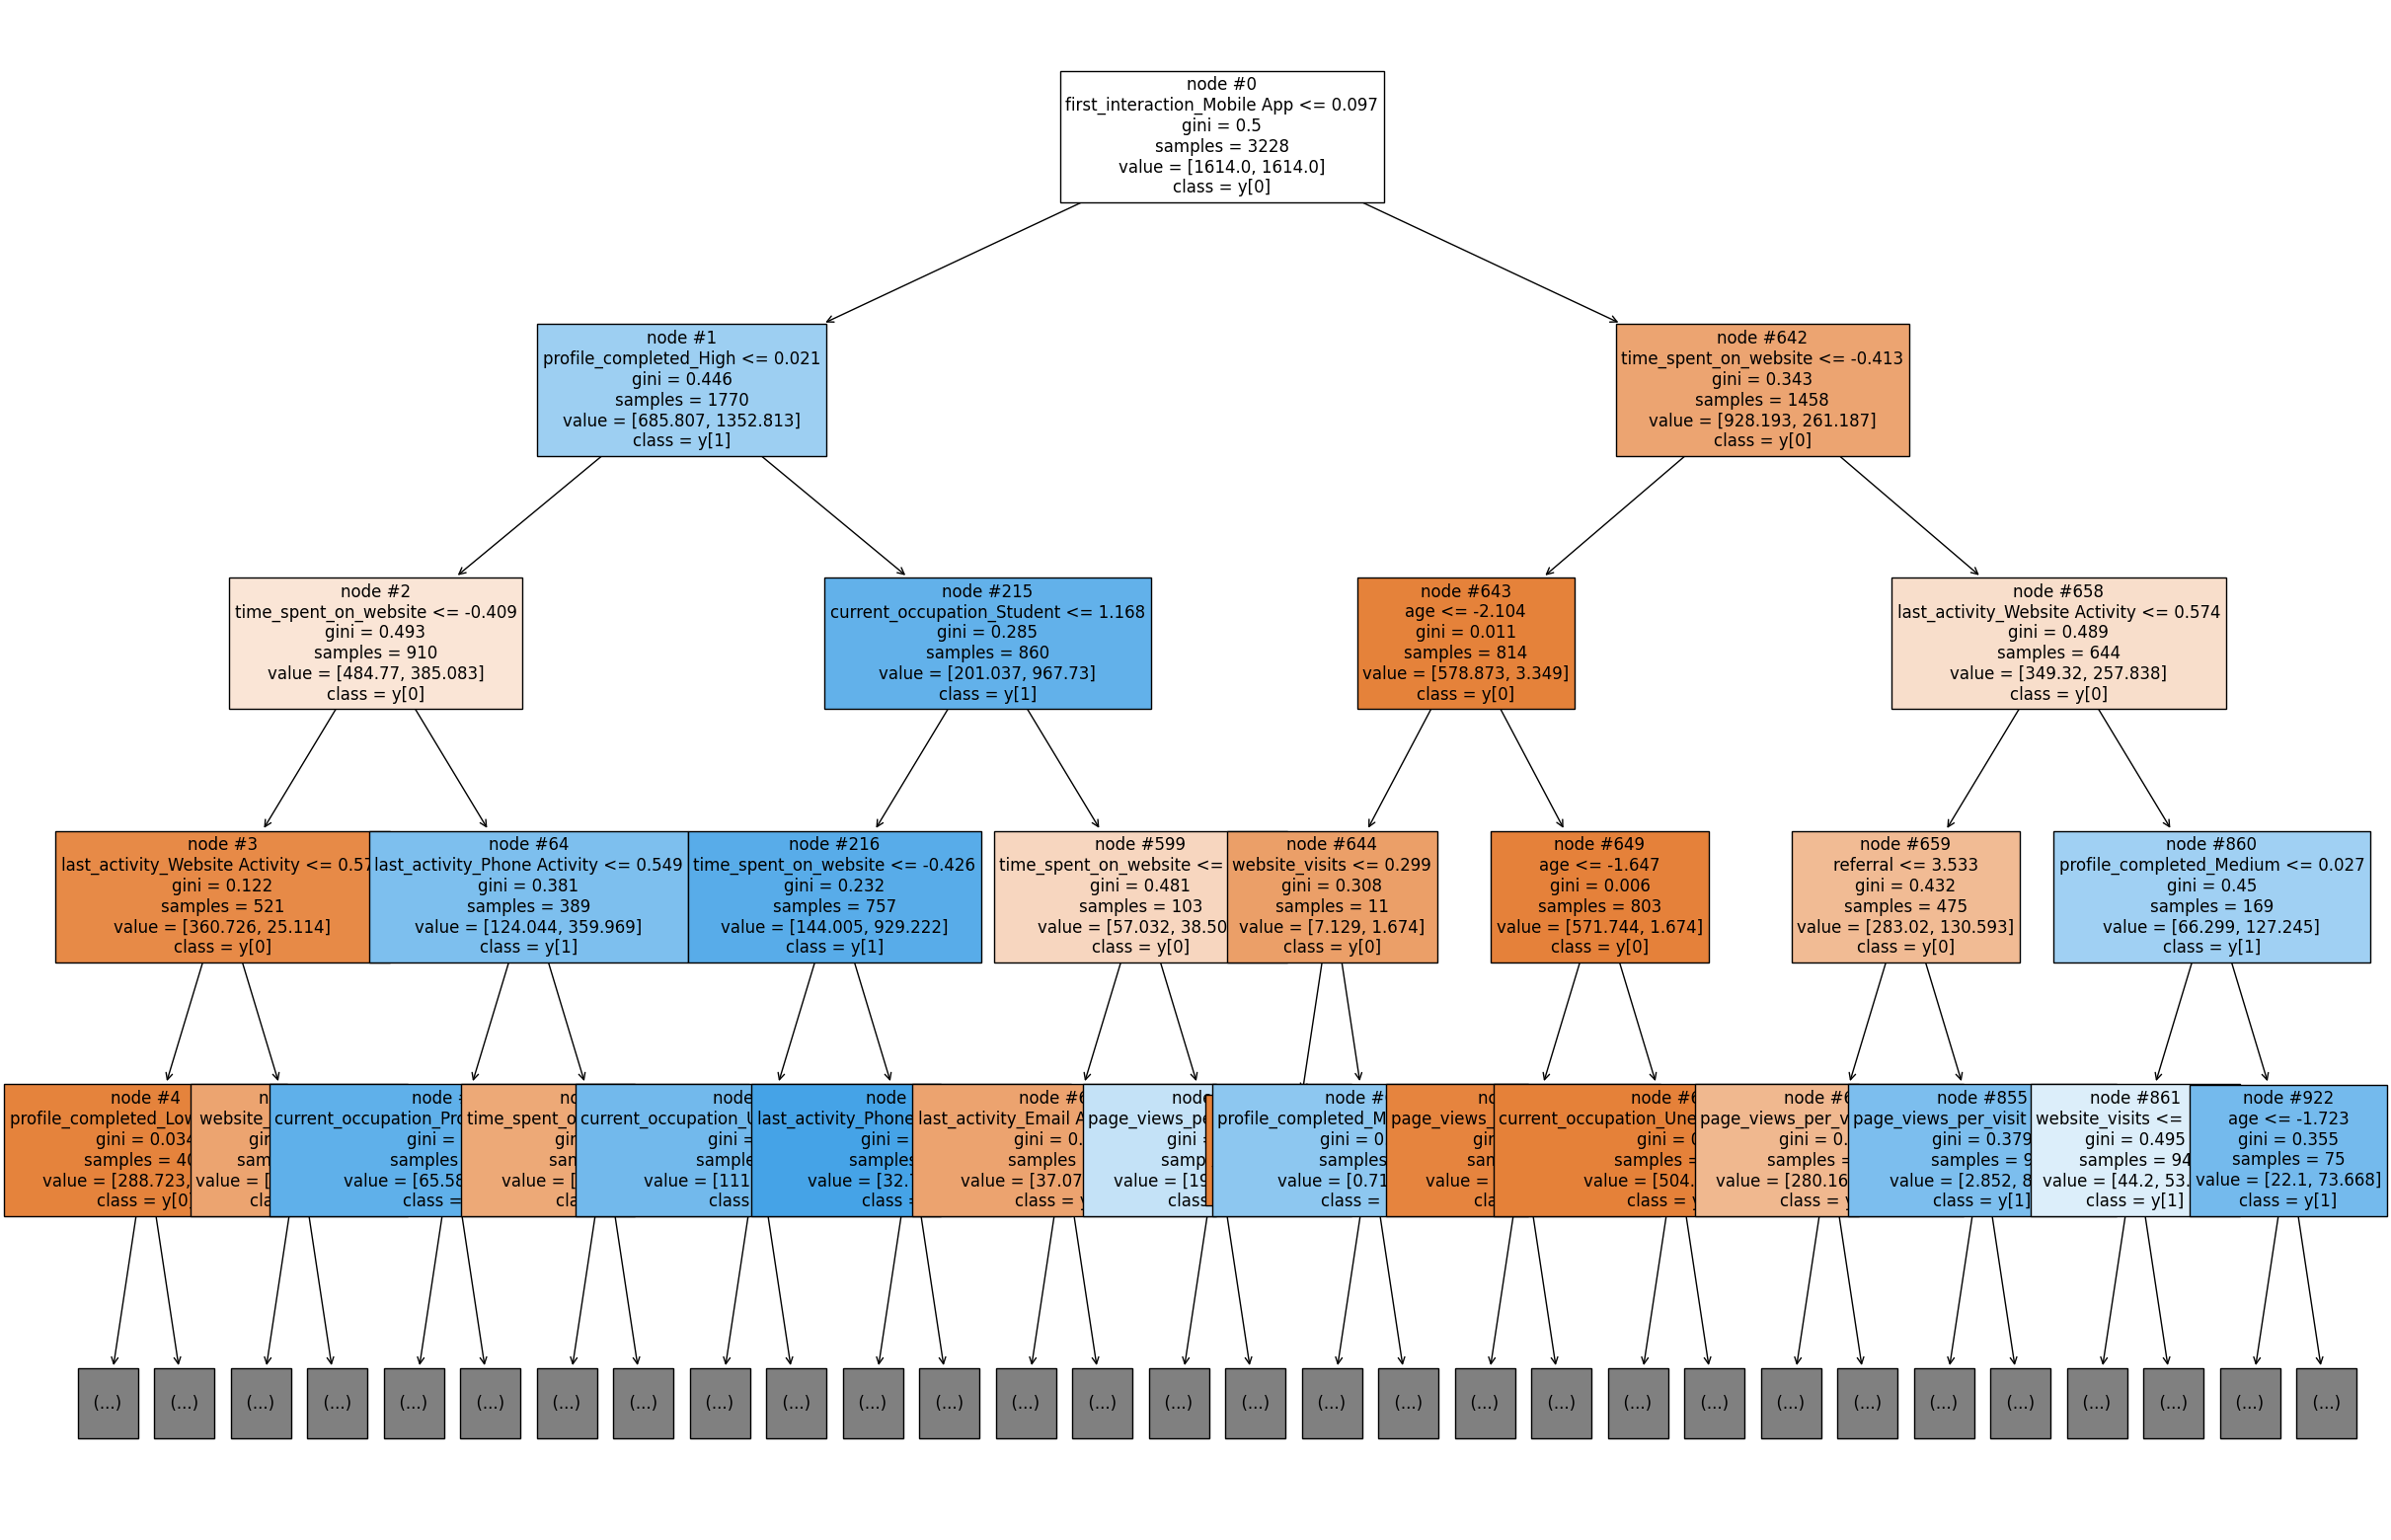

In [ ]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

Note:
Blue leaves represent the paid customers, i.e., y[1] and the orange leaves represent the unpaid customers, i.e., y[0]. Also, the more the number of observations in a leaf, the darker its color gets.

## Do we need to prune the tree?

From the value of precision and recall, it seems that there is still big room for further improving the performance in terms of recall and precision. So we need to fine tune the following hyperparameters of the tree:

1) Maximum depth of the tree.

2) Choice of criterion (either gini or entropy).

3) Minimum number of samples per leaf.



In [ ]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = 'balanced')

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [1, 5, 10, 15, 20, 25, 30]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train_scaled, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train_scaled, y_train)

print(d_tree_tuned)
print(d_tree_tuned)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, random_state=7)
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, random_state=7)


We have tuned the model and fit the tuned model on the training data. Now, let's check the model performance on the training and testing data.

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



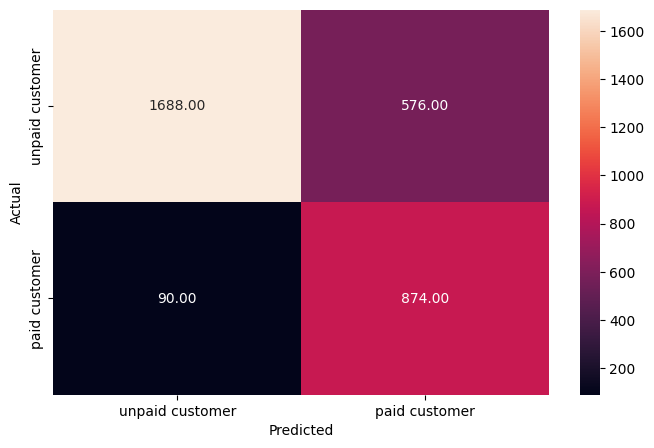

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = d_tree_tuned.predict(X_train_scaled)

metrics_score(y_train, y_train_pred_dt)


              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



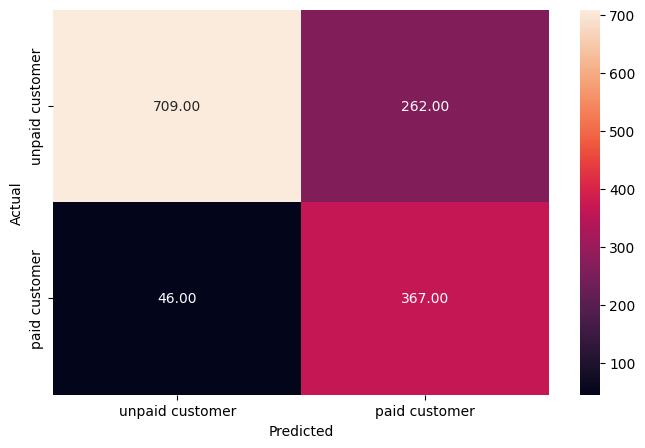

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = d_tree_tuned.predict(X_test_scaled)

metrics_score(y_test, y_test_pred_dt)



Observations:

Using the tuned tree, the recall and precision for training data no longer 100% which is for the case of single tree without tuning. This may suggests that no gain achieved for training data after tuning.
However, the difference between the recall/precision of testing data and training data is less than that of the previous tree without tuning. This implies that overfitting still exist but much less serious after tuning.

Comparing with the previous tree without tuning, the precision is decreased from 67 % to 58 % but the recall is greatly increased from 64 % to 89 %. This matches with the principle that recall is increased in the expense of the precision and vice versa. The f1-score is increased from 0.65 to 0.7.

Here,

Type 1 error : unpaid customer is misclassified as paid customer.

Type 2 error : Paid customer is misclassified as unpaid customer.

Type 2 error is more serious than type 1 error because large type 2 error
will make the company lose lots of true customers whereas large type 1 error
will just make the company to waste more time to follow up the unpaid customers.

So it is reasonable to minimize type 2 error in the expense of increasing the type 1 error. In short we need to maximize recall in the expense of decreasing the precision. So the tuned tree is better than the previous tree without tuning because the recall is much larger (increased by 25 %) even though the precision is slightly decreased by 9 % only.

So in conclusion there is significant gain after tuning the tree.

Let's plot the feature importance and check the most important features.


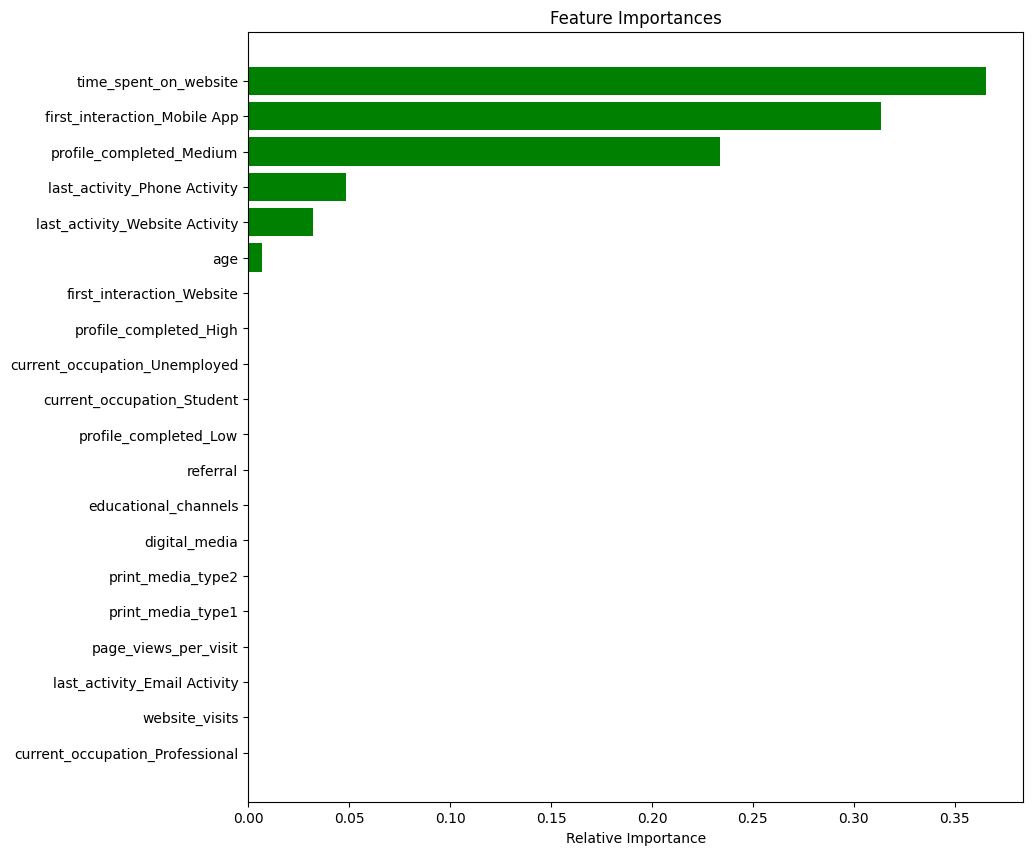

In [ ]:
#Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.barh(range(len(indices)), importances[indices], color = 'green', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.show()

#importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

#print(importance_df)


Observations:

The 5 most important features are:

1) time spent on website   (Same as previous tree).

2) Is first interaction through mobile App (Same as previous tree).

3) Is profile completed is medium.

4) Is last activity phone.

5) Is last activity website.

It seems that the 2 most imnportant features is same as previous tree

and the rest of 3 (ranked 3 to 5) are different from previous tree.




Let's plot the tree and check:

As we know the decision tree keeps growing until the nodes are homogeneous, i.e., it has only one class, and the dataset here has a lot of features, it would be hard to visualize the whole tree with so many features. Therefore, we are only visualizing the tree up to max_depth = 4.

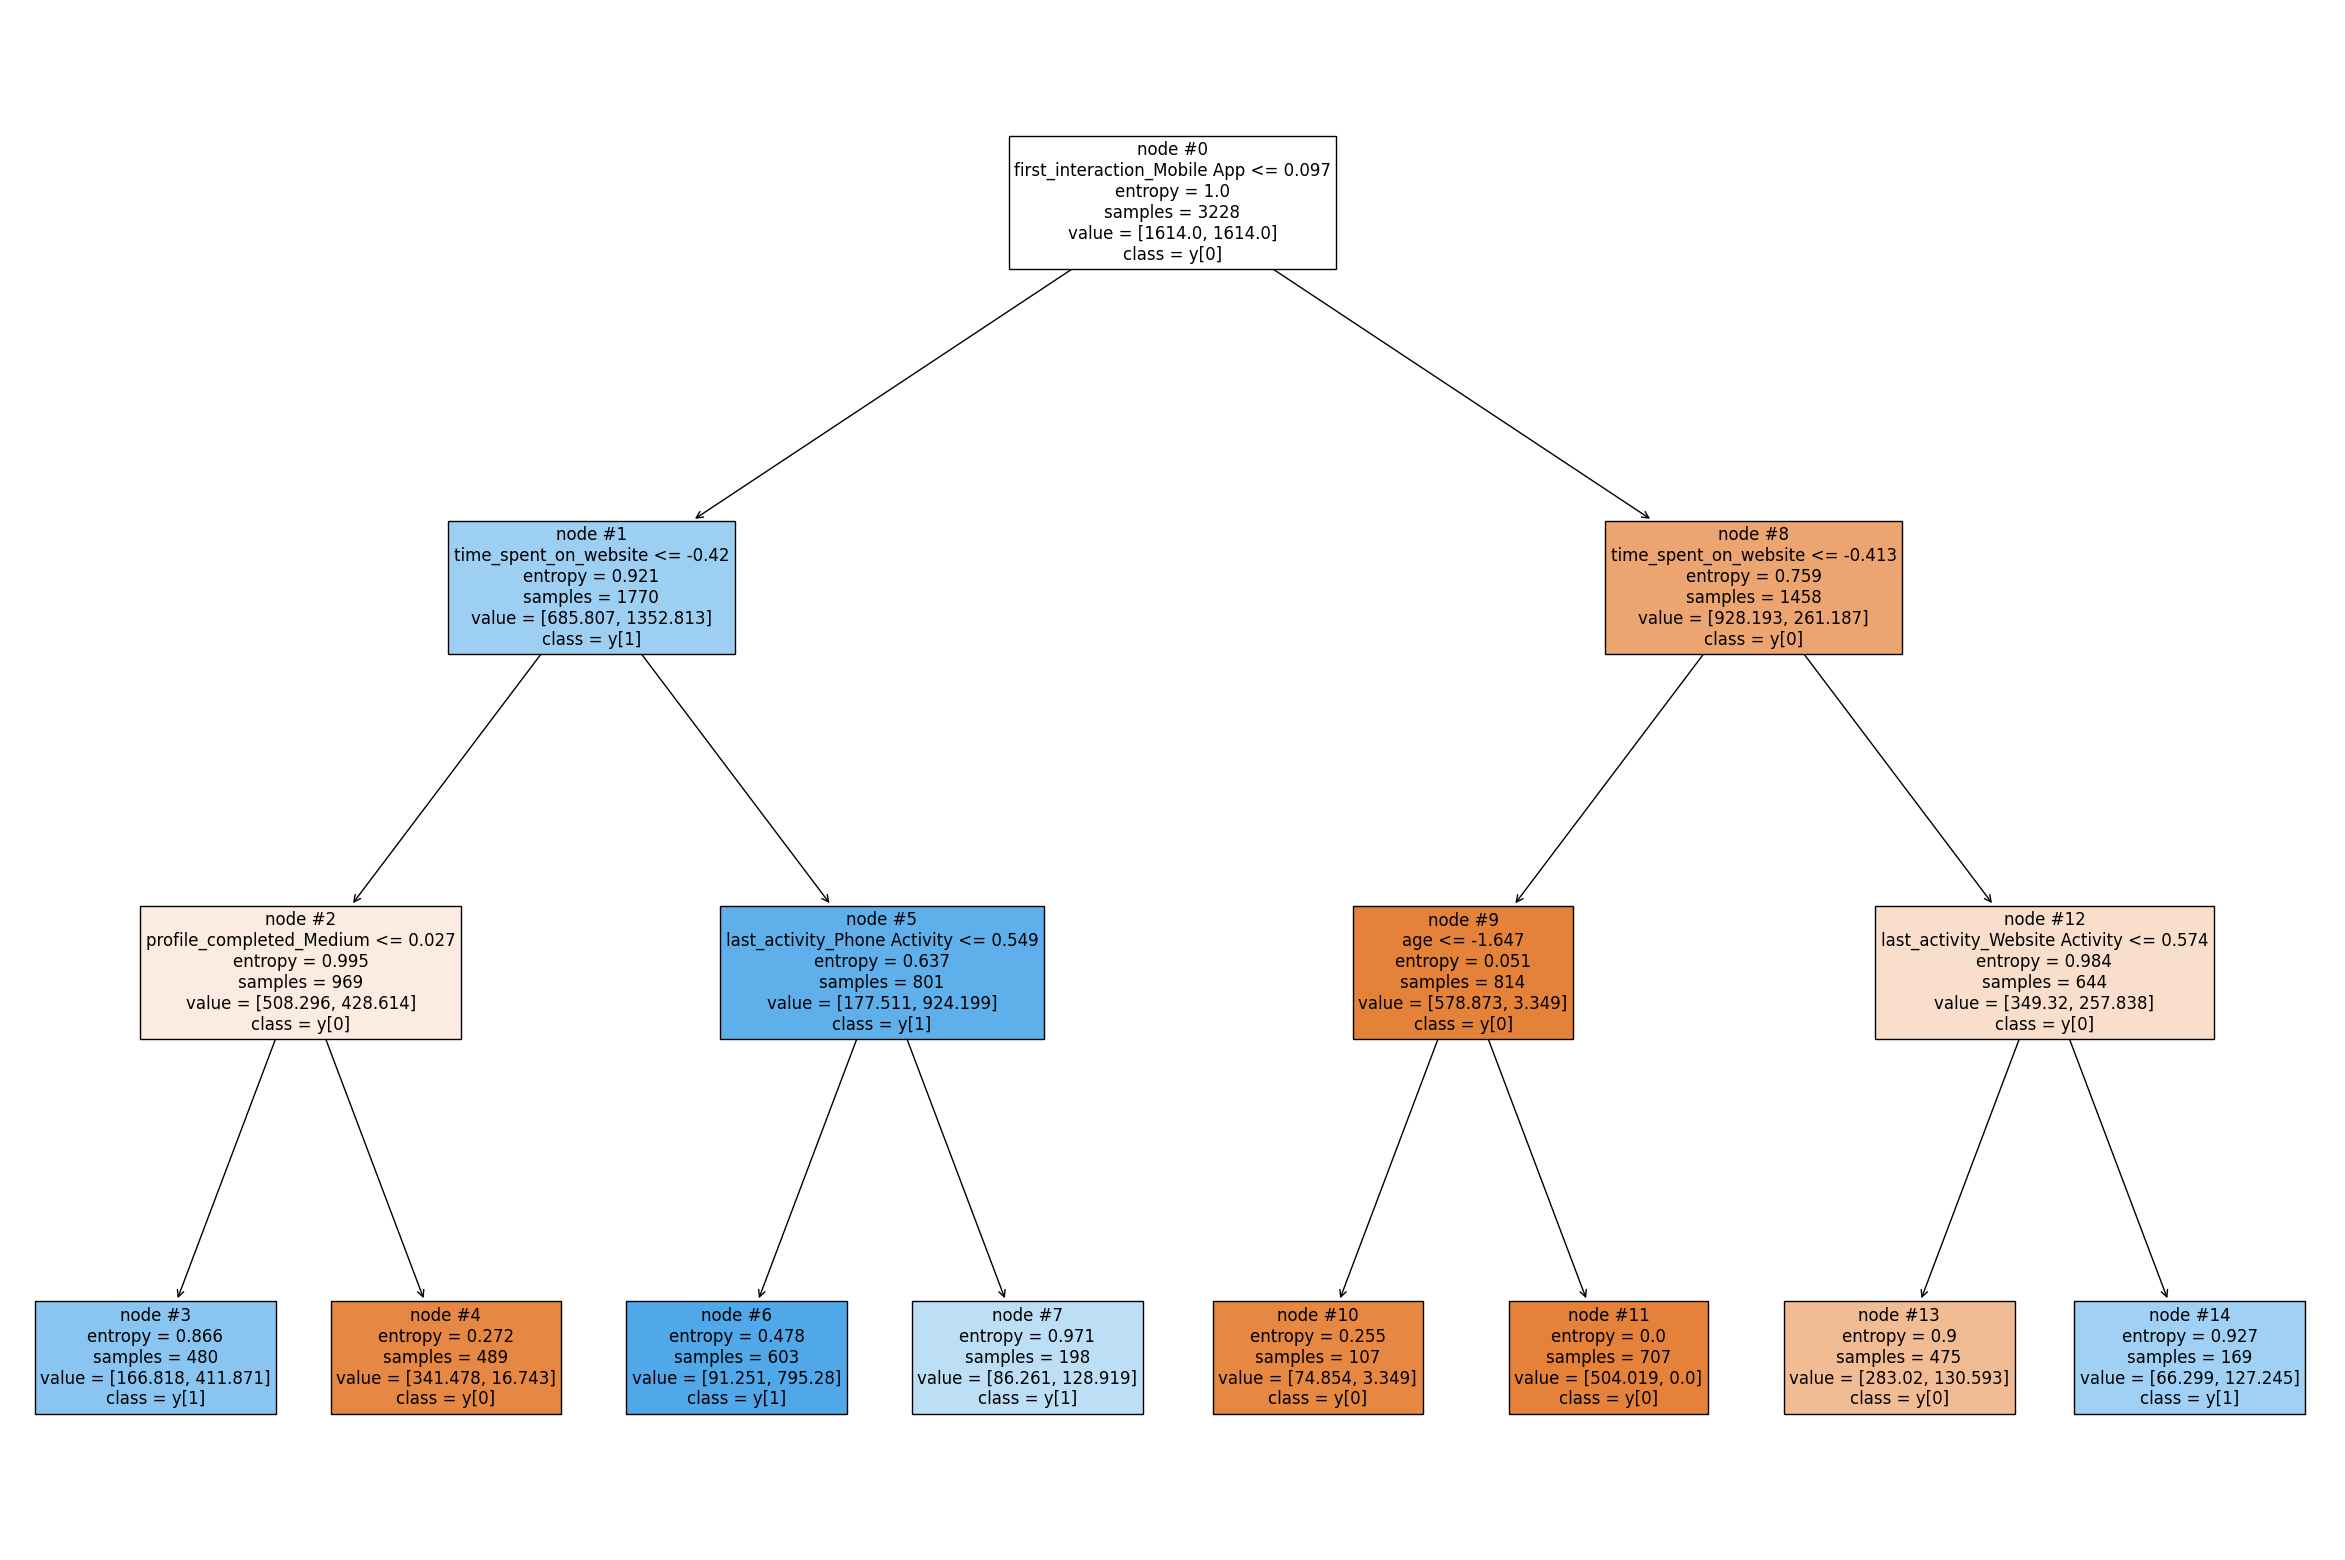

In [ ]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(d_tree_tuned, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()



## Building a Random Forest model

Random Forest
Random Forest is a bagging algorithm where the base models are Decision Trees. Samples are taken from the training data and on each sample, a decision tree makes a prediction.
The results from all the decision trees are combined and the final prediction is made using voting (for classification problems) or averaging (for regression problems).**

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = 'balanced', random_state = 1)

rf_estimator.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



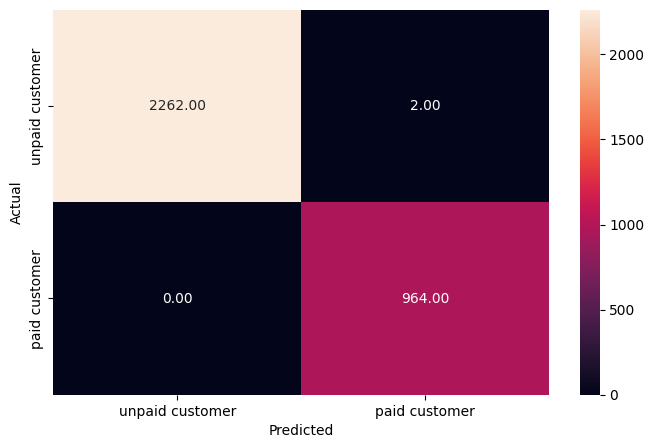

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_rf)

Observation:

For all the metrics in the training dataset, the Random Forest gives a 100% score. Only 2 false negative cases in total. No false positive case detected.


              precision    recall  f1-score   support

           0       0.89      0.92      0.90       971
           1       0.80      0.72      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



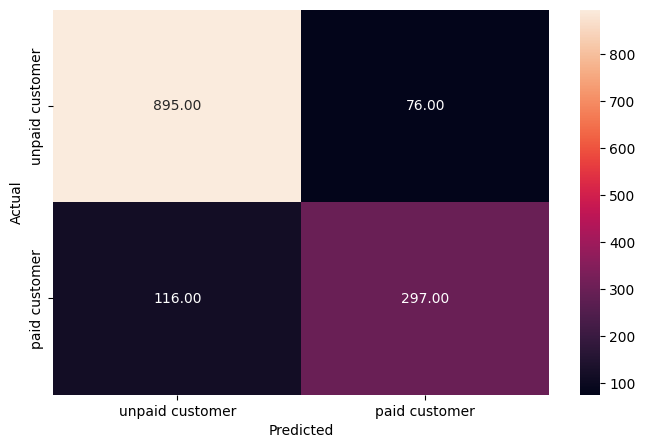

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_rf)

Observations:

The Random Forest classifier seems to be overfitting the training data because the recall and precision is 0.72 and 0.80 respectively which is lower than the corresponding value for training data which are both 1.

The recall on the training data is 1, while the recall on the test data is only ~ 0.72 for class 1. This means that 28 % (1-0.72) of the potential customers were lost (28 % of paid customers were detected as unpaid customers).
Precision for the test data is 0.80. This means that 20 % (1-0.80) of the
unpaid customers were wrongly detected as paid customers. The company wastes 20% of its time and resources to follow up these unpaid customers which were wrongly misunderstood as paid customers.

However, comparing with the single tree model in previous section, the recall and precision are both improved. The recall is increased from 64 % to 72 %, whereas the precision is increased from 67 % to 80 %. This implies that the number of potential paid customers lost is reduced by 8 %. More, the number of unpaid customers wrongly detected as paid customers is reduced by 13 % that implies the amount of time and resources wasted to follow up unpaid customers can be reduced by 13 %. F1 score is increased greatly from 65 % to 76 %.

In conclusion, the random forest(without tuning) is much better than the single tree (without tuning). Here in order to have a fair comparsion I just compare the performance of the random forest without tuning with the single tree without tuning. I will compare the single tree after tuning with the random forest after tuning later.



Let's check the feature importance of the Random Forest

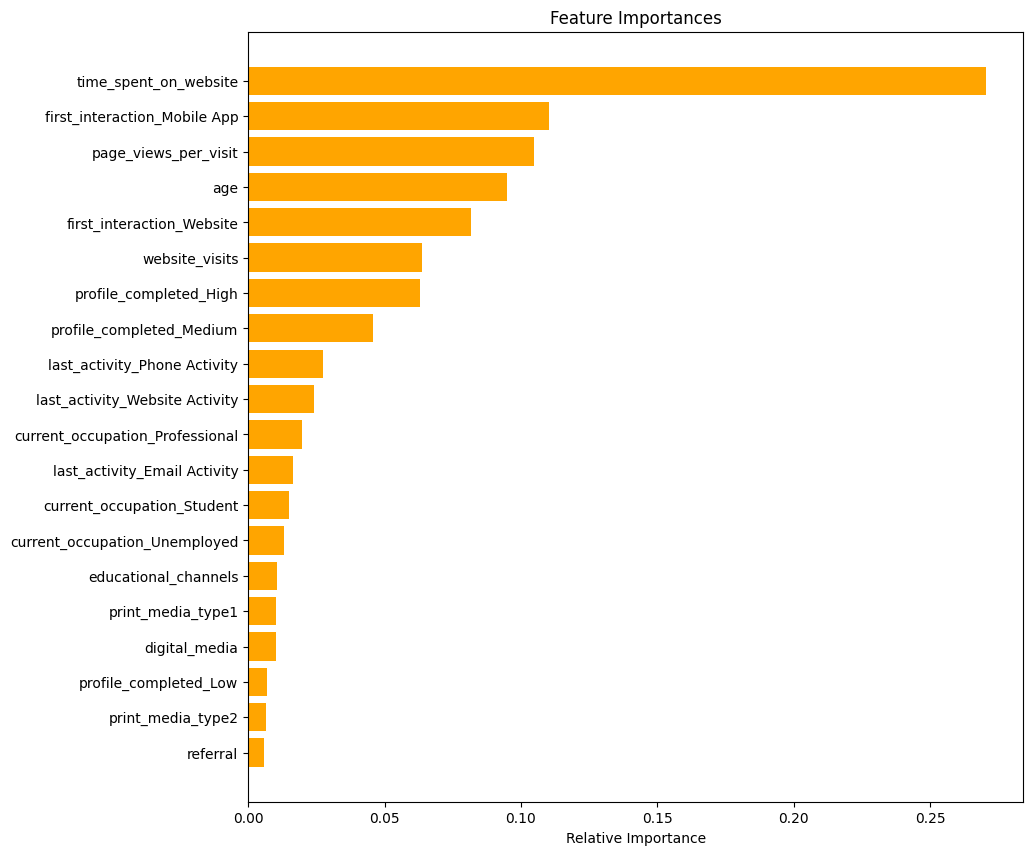

In [ ]:
#Plotting the feature importance
importances = rf_estimator.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.barh(range(len(indices)), importances[indices], color = 'orange', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.show()

#importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

#print(importance_df)

Observations:

The 5 most important features are as below:

1) Time spent on website.

2) Whether first interaction is mobile app.

3) Page views per visit.

4) Age.

5) Whether first interaction is website.



## Do we need to prune the tree?

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [5, 10, 15, 20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{1: 0.7, 0: 0.3}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train_scaled, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_estimator_tuned.fit(X_train_scaled, y_train)

print(rf_estimator_tuned)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=110, random_state=7)


              precision    recall  f1-score   support

           0       0.94      0.85      0.89      2264
           1       0.71      0.87      0.78       964

    accuracy                           0.86      3228
   macro avg       0.83      0.86      0.84      3228
weighted avg       0.87      0.86      0.86      3228



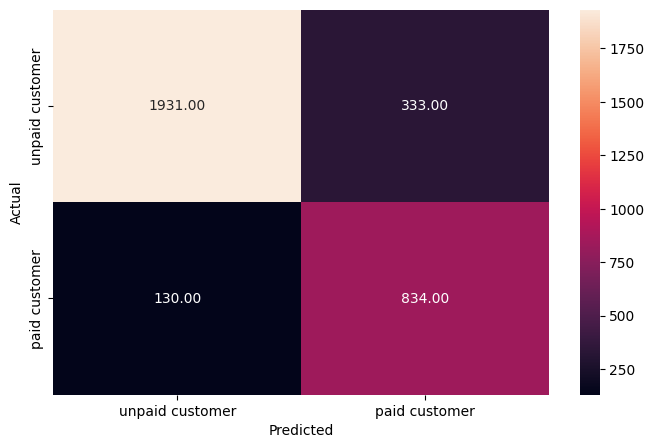

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator_tuned.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_rf)


              precision    recall  f1-score   support

           0       0.92      0.85      0.88       971
           1       0.70      0.82      0.76       413

    accuracy                           0.84      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.84      0.85      1384



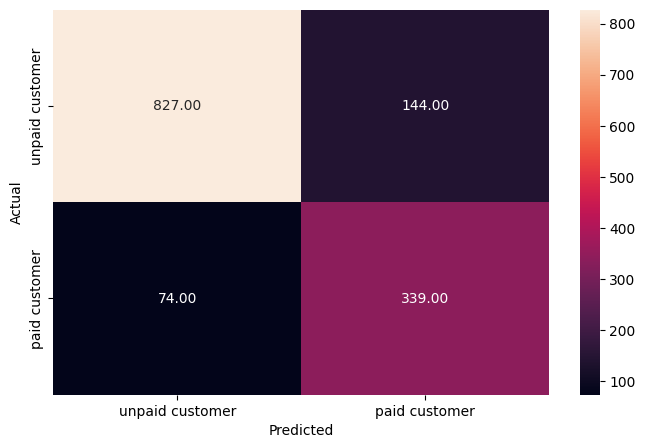

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator_tuned.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_rf)



Observations:

1) Like the tuned single tree, the tuned random forest recall and precision no longer 100 % for training data. The difference between the recall/precision for training data and testing data is greatly reduced. These 2 observations are due to the reduction of the overfitting for tuned random forest.

2) After tuning, recall is increased from 72 % to 82 % but precision is decreased from 80 % to 70 %. f1 - score is unchanged (from 0.76 to 0.76).
Recall is improved in the expense of precision.

As mentioned before, maximimizing recall in the expense of decreasing precision is a good choice since losing less customers is more important than saving more time to follow up unpaid customers. So in short the tuned random forest is better than the previous random forest without tuning.


Let's plot the feature importance and check the most important features.


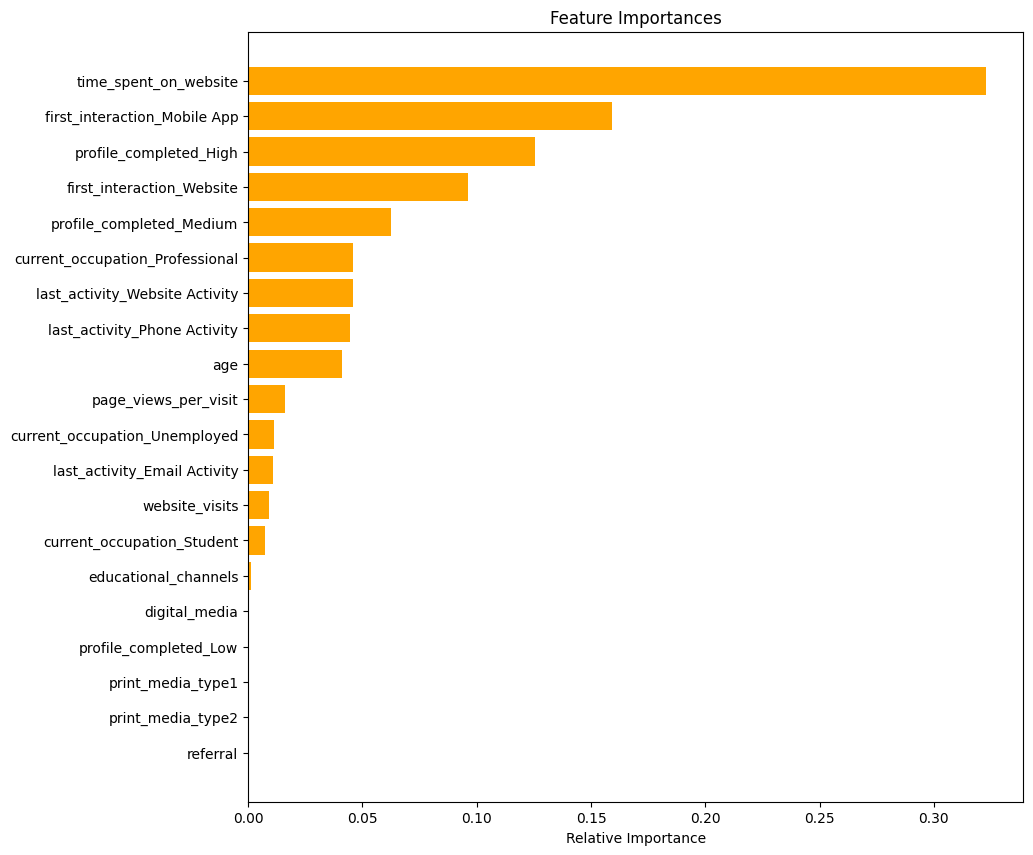

In [ ]:
#Plotting the feature importance
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.barh(range(len(indices)), importances[indices], color = 'orange', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.show()

#importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

#print(importance_df)



Observations:
The 3 most important features importance  is as below:

1) time_spent_on_website.

2) first_interaction_Mobile App.

3) profile_completed_High.

Time spent on website is most important which is same result as the previous random forest without tuning, first interaction with mobile app is
second most important which is also same as before and the profile completion is high or not is the third most important. The third most important features after tuning is different from the corresponding feature without tuning.


## Actionable Insights and Recommendations

Professional occupies the largest percentage of all paid customers.
So the more job related courses at professional level
for different fields should be offered in the future.
This group of people should be the main focus of the potential
customers in the future and more resources should be spent
on this group of people in order to convert them to paid customers.
Besides, this group of people is most busy group of people who has full time
job from Mon-Fri. So it is no good to promote the course details
through phone during daytime when they are working during this period.
The promotion can be performed through email anytime or phone after the typical
office hour (9:00-18:00).
The updated online course materials should be available starting from Saturday
which is the holiday for this group of people. Extra tutorials session can be offered at night of Saturday or afternoon of Sunday which fits the timetable of this group of people.


Most paid customers interacts through website instead of mobile apps.
So more resources can be spent on improving and upgrading quality of the website. In order words, save resources from maintaining the mobile apps
which is not the main interaction for the potential customers.


More resources should be spent on people who have completed high
proportion of the profile in order to convert them to paid customers.


More resources should be spent on people who have spent long time
on visiting the websites in order to convert them to paid customers.

Most paid customer made the decision to pay in website.
Least paid customer made the decision to pay in phone.

The lead who had heard about ExtraaLearn through reference are more likely
to pay finally. So more resources can be spent to encourage more paid customers
to recommend more people to pay for the courses. For example, offering gift to the people who has successfully recommended new customer to pay for the courses. Or people who successfully recommended new people to pay can enjoy a discount for the course(s).







